Bereinigter Datensatz:
  SDV_ARS                GEN  anzahl_niederlassungen  abhaengig_beschaeftigte  \
0   01001   Flensburg, Stadt                    3807                    47451   
1   01002        Kiel, Stadt                    9508                   135438   
2   01003      Lübeck, Stadt                    8864                   108120   
3   01004  Neumünster, Stadt                    3386                    44991   
4   01051       Dithmarschen                    6246                    45699   

   sv_beschaeftigte  geringfuegig_entlohnt_beschaeftigte           cx  \
0             41742                                 5709  526874.0933   
1            119553                                15885  574533.5472   
2             97359                                10761  611152.6217   
3             40453                                 4538  563655.5890   
4             39400                                 6299  507382.3417   

            cy  
0  6069700.375  
1  6015984.970  


<Figure size 1000x600 with 0 Axes>

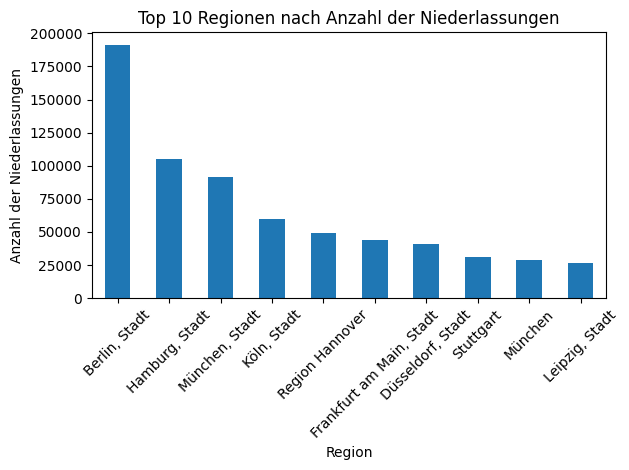

In [10]:
import pandas as pd

# Laden des Datensatzes
file_path = 'regionaleWirtschaftsstruktur.csv'
data = pd.read_csv(file_path, delimiter=';')

#  Bereinigung
# So, dass 'SDV_ARS' (AGS-Schlüssel) als String behandelt und auch führende Nullen enthält.
data['SDV_ARS'] = data['SDV_ARS'].astype(str).str.zfill(5)

# Spalten mit Kommas als Dezimaltrennzeichen 
def convert_to_numeric(column):
    return pd.to_numeric(column.str.replace(',', '.'), errors='coerce')

# Spalten 'cx' und 'cy' müssen konvertiert werden.
data['cx'] = convert_to_numeric(data['cx'])
data['cy'] = convert_to_numeric(data['cy'])

#  anzeigen
print("Bereinigter Datensatz:")
print(data.head())


#Visualisierung
import matplotlib.pyplot as plt

# zb. Balkendiagramm der Niederlassungen nach Region
plt.figure(figsize=(10, 6))
data.sort_values('anzahl_niederlassungen', ascending=False).head(10).plot(
    x='GEN', y='anzahl_niederlassungen', kind='bar', legend=False
)
plt.title('Top 10 Regionen nach Anzahl der Niederlassungen')
plt.xlabel('Region')
plt.ylabel('Anzahl der Niederlassungen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [11]:
data

,SDV_ARS,GEN,anzahl_niederlassungen,abhaengig_beschaeftigte,sv_beschaeftigte,geringfuegig_entlohnt_beschaeftigte,cx,cy
0,01001,"Flensburg, Stadt",3807,47451,41742,5709,526874.0933,6069700.375
1,01002,"Kiel, Stadt",9508,135438,119553,15885,574533.5472,6015984.970
2,01003,"Lübeck, Stadt",8864,108120,97359,10761,611152.6217,5969413.741
3,01004,"Neumünster, Stadt",3386,44991,40453,4538,563655.5890,5993256.938
4,01051,Dithmarschen,6246,45699,39400,6299,507382.3417,6004830.308
...,...,...,...,...,...,...,...,...
395,16073,Saalfeld-Rudolstadt,4080,34974,32109,2865,663144.3957,5612923.822
396,16074,Saale-Holzland-Kreis,3261,27212,25167,2044,695814.1922,5646123.638
397,16075,Saale-Orla-Kreis,3514,28534,26427,2108,693419.2656,5599237.381
398,16076,Greiz,4206,28973,26611,2362,717994.1631,5622520.844


In [12]:
data = data['SDV_ARS']

In [16]:
data['AGS_0'] = data['AGS_0'].astype('str')

In [20]:
data.to_csv('firas2.csv')